In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Styling for plots
sns.set(style="whitegrid")

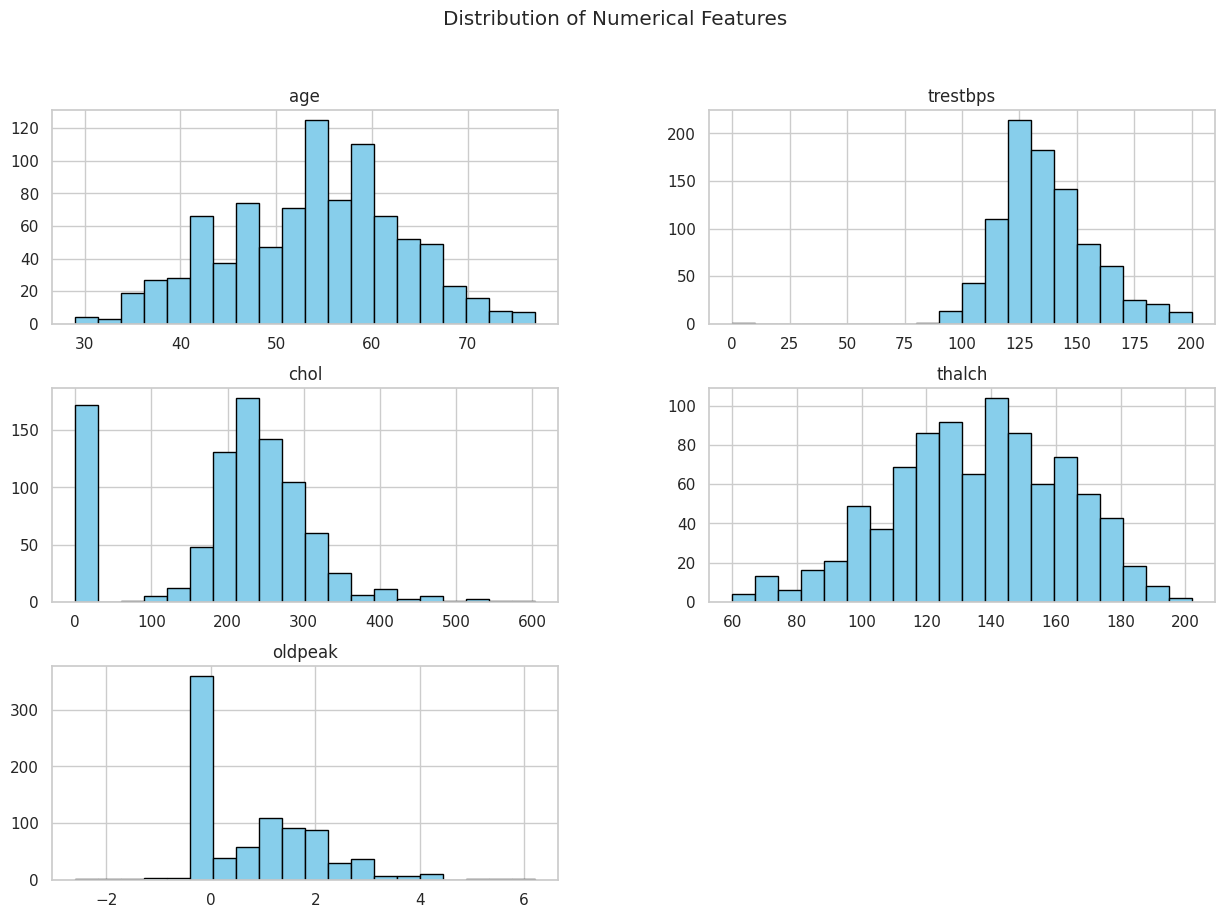

/tmp/ipython-input-1643721154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set2')
/tmp/ipython-input-1643721154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set2')
/tmp/ipython-input-1643721154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set2')
/tmp/ipython-input-1643721154.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

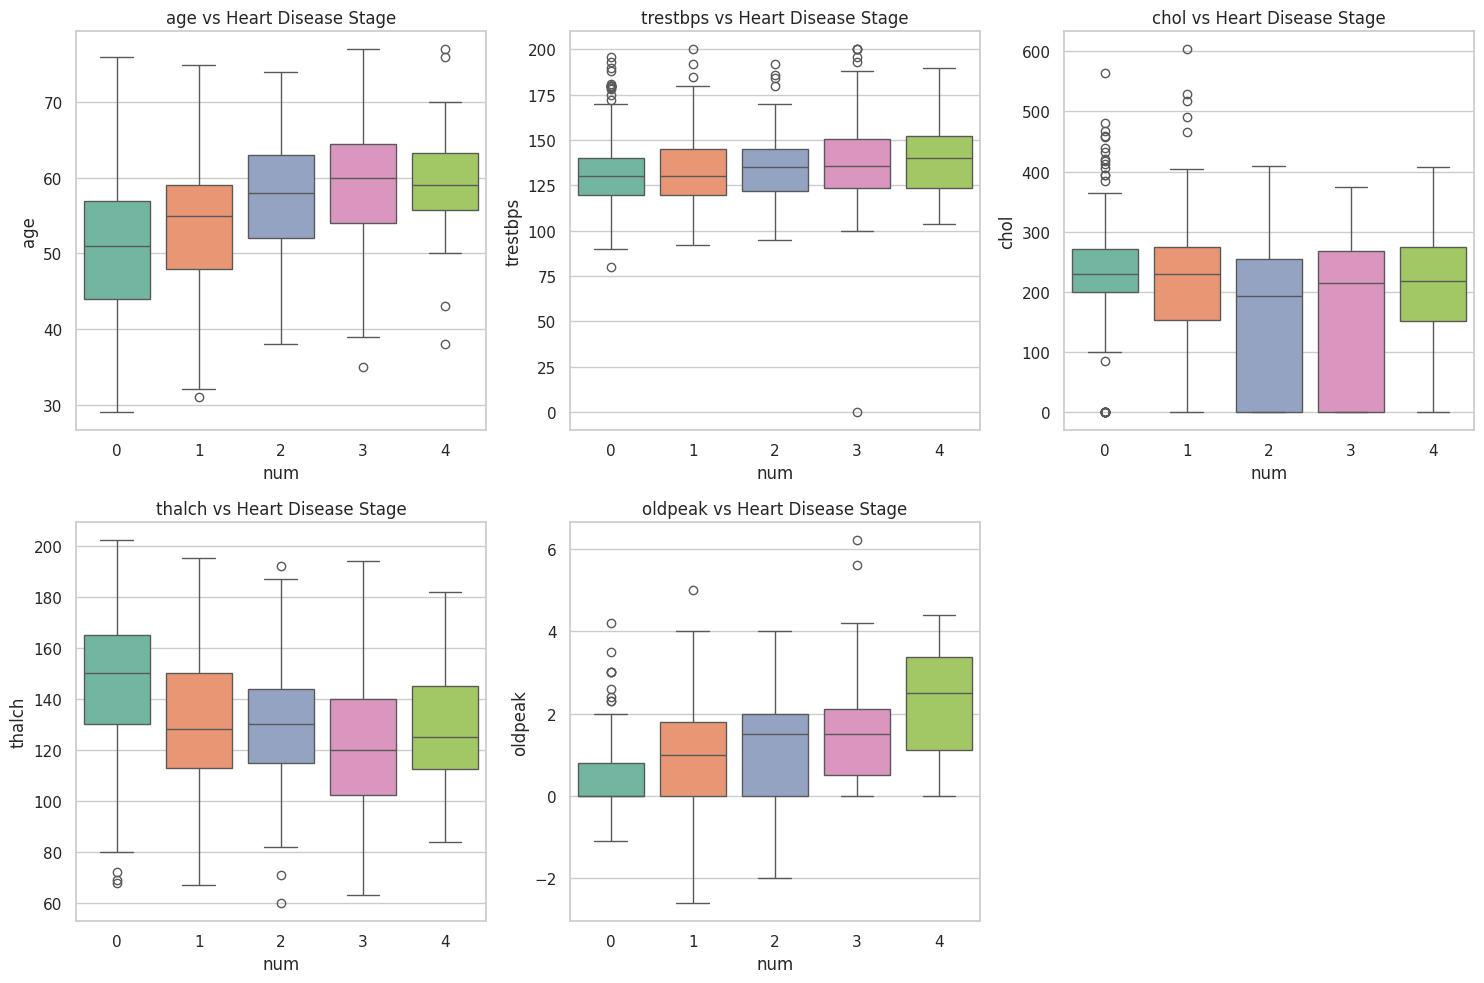

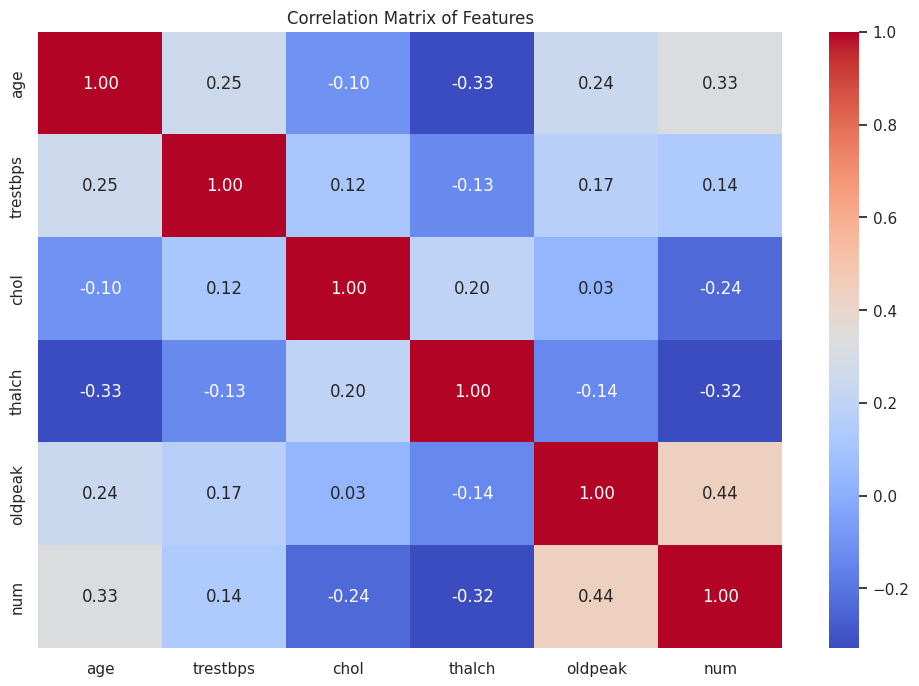

In [2]:
# Load dataset
df = pd.read_excel("heart_disease.xlsx", sheet_name=1)

# 1. Histograms for distributions
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# 2. Box plots for relationship with Target
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Heart Disease Stage')
plt.tight_layout()
plt.show()

# 3. Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols + ['num']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [3]:
# Explicit Outlier Detection using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"Detected {outliers_count} outliers in {col}. Capping to bounds.")
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Clean missing values after outlier handling
df = df.dropna()

Detected 1 outliers in age. Capping to bounds.
Detected 22 outliers in trestbps. Capping to bounds.
Detected 187 outliers in chol. Capping to bounds.
Detected 1 outliers in thalch. Capping to bounds.
Detected 16 outliers in oldpeak. Capping to bounds.


In [4]:
# Encoding
le = LabelEncoder()
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Feature Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define Features and Target
X = df.drop("num", axis=1)
y = df["num"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Grid Search for Hyperparameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

# Final Evaluation
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print("\n--- Final Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}

--- Final Model Performance ---
Accuracy: 0.5529
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        80
           1       0.34      0.56      0.42        41
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         8

    accuracy                           0.55       170
   macro avg       0.22      0.29      0.25       170
weighted avg       0.44      0.55      0.49       170



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
